In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import and wrangle emissions data

In [2]:
df_emissions = pd.read_csv('BP_CO2_2021.csv')

years_emissions = df_emissions['Year']
emissions = df_emissions['World_carb_emis']
emissions = emissions/1000     #convert from MTCO2 to GTCO2

Import and wrangle concentration data

In [3]:
df_concs = pd.read_csv('monthly_co2.csv')

df_concs = df_concs.drop(df_concs[df_concs['CO2[ppm]'] == -99.99].index)

dates_concs = df_concs['Date']
concs = df_concs['CO2[ppm]']

Import and wrangle temperature data

In [4]:
df_temps = pd.read_csv('tempdata3.csv')

df_temps['paris1_5'] = np.full((173,1),1.5)
df_temps['paris2_0'] = np.full((173,1),2.0)
df_temps['preind'] = np.full((173,1),0)

temps_years = df_temps['Year']
temps = df_temps['HadCRUT5 (degC)']
paris1_5 = df_temps['paris1_5']
paris2_0 = df_temps['paris2_0']
preind = df_temps['preind']

df_temps['rolling_temps_10_centred']=df_temps['HadCRUT5 (degC)'].rolling(10,center=True).mean()
tenyearav_centred = df_temps['rolling_temps_10_centred']
df_temps['rolling_temps_20_centred']=df_temps['HadCRUT5 (degC)'].rolling(20,center=True).mean()
twentyyearav_centred = df_temps['rolling_temps_20_centred']


Plot all data

Compare all to PreIndustrial Baseline???

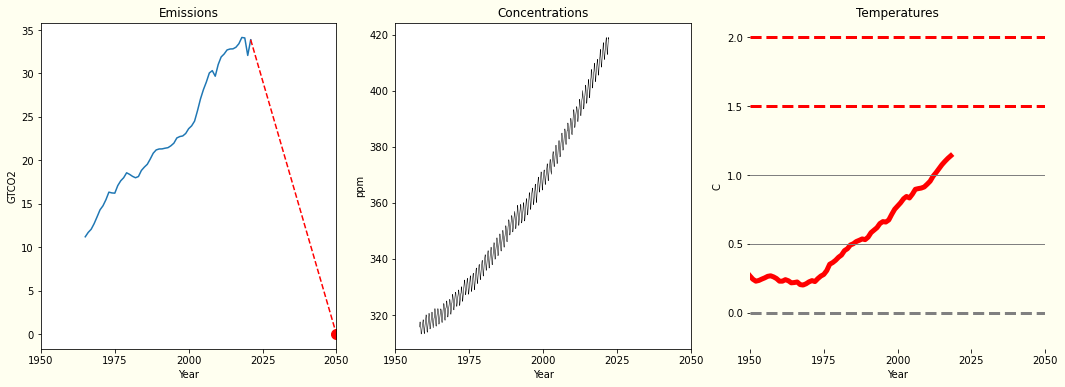

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

year_limits = [1950,2050]
year_ticks = [1950,1975,2000,2025,2050]

ax1.plot()
ax1.plot(years_emissions,emissions)
ax1.plot(2050,0,'ro',markersize='10')
ax1.plot([2021,2050],[emissions[56],0],'r--')

#plt.xlim([1950,2070])
#plt.xticks([1950,1975,2000,2025,2050])
#plt.ylim([0,40])

ax1.set_title('Emissions')
ax1.set_xlabel('Year')
ax1.set_ylabel('GTCO2')

ax1.set_xlim(year_limits)
ax1.set_xticks(year_ticks)

#ax2.plot()
ax2.plot(dates_concs,concs,'k-',linewidth=0.5)
ax2.set_xlabel('Year')

ax2.set_title('Concentrations')
ax2.set_xlabel('Year')
ax2.set_ylabel('ppm')

ax2.set_xlim(year_limits)
ax2.set_xticks(year_ticks)

#ax3.plot()

ax3.plot(temps_years,tenyearav_centred,'r-',linewidth=5,label='10 Year Rolling Average') 
ax3.set_title('Temperatures')
ax3.set_xlabel('Year')
ax3.set_ylabel('C')

plt.axhline(y = 0.0 ,color='grey', linestyle='--', linewidth=3)
plt.axhline(y = 1.5 ,color='red', linestyle='--', linewidth=3)
plt.axhline(y = 2.0, color='red', linestyle='--', linewidth=3)
plt.axhline(y = 0.5, color='grey', linestyle='-', linewidth=1)
plt.axhline(y = 1.0, color='grey', linestyle='-', linewidth=1)

#ax3.plot(temps_years,paris1_5,color='red',linestyle='--',label='_nolegend_')
#ax3.plot(temps_years,paris2_0,color='red',linestyle='--',label='_nolegend_')
#ax3.plot(temps_years,preind,color='grey',linestyle='--',label='_nolegend_')

ax3.set_xlim(year_limits)
ax3.set_xticks(year_ticks)

plt.gcf().set_size_inches(18,6)
fig.patch.set_facecolor('ivory')

ax3.set_frame_on(False)

plt.savefig('Combined Figure.png',bbox_inches='tight', pad_inches=0.5)
